Christiaan van Roon - 11122854  
Sander Hansen - 10995080

# Warping and Estimation

In [1]:
#Pylab inline is not a good habit to use
import numpy
import matplotlib

from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.core.pylabtools import figsize, getfigs
from skimage.transform import warp

from pylab import *
from numpy import *

## Affine transform

*Write a function affineTransform(f, x1, y1, x2, y2, x3, y3, width, height) that warps the parallelogram defined by the three points (x1,y1), (x2,y2) and (x3,y3) onto a new image of given width and height. Here we assume that the coordinates are given with respect to the graphical axis (x from left to right, y from top to bottom).*

*The mapping of the points (xi,yi)(xi,yi) in the image ff to the points (x′i,y′i)(xi′,yi′) in the resultant image should be:*

| i | $(x_{i}, y_{i})$ | $(x^{'}_{i}, y^{'}_{i})$ |
|---|------------------|--------------------------|
| 1 | (x1, y1)| (0,0)                  |
| 2 | (x2, y2) | (width - 1,0)          |
| 3 | (x3, y3) | (0,height - 1)         |

In [2]:
def affineTransform(f, x1, y1, x2, y2, x3, y3, width, height):
    M = np.matrix([[x1, y1, 1, 0, 0 ,0],
                   [0, 0, 0, x1, y1, 1],
                   [x2, y2, 1, 0, 0 ,0],
                   [0, 0, 0, x2, y2, 1],
                   [x3, y3, 1, 0, 0 ,0],
                   [0, 0, 0, x3, y3, 1]])
    
    q = np.array([[0], [0], [width - 1], [0], [0], [height - 1]])
    
    p = np.linalg.lstsq(M, q)[0]
    A = np.array([[p[0][0], p[1][0], p[2][0]],
                [p[3][0], p[4][0], p[5][0]],
                [0, 0, 1]])

    trans = warp(f, np.linalg.inv(A), output_shape=[height, width])
    return trans

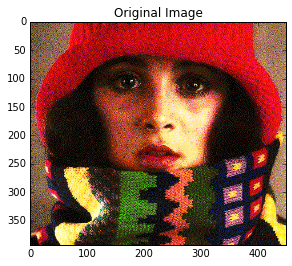

In [3]:
#Read in image
img = imread('TestData/colortrui.png')
plt.imshow(img)
plt.title("Original Image")
plt.show()

*Be sure that your code works with:*

* *image of unequal width and height*

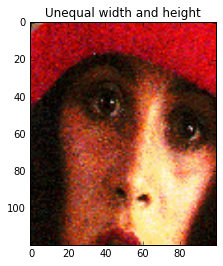

In [4]:
img_affine = affineTransform(img, 50, 50, 300, 10, 100, 250, 100, 120)

plt.imshow(img_affine)
plt.title("Unequal width and height")
plt.show()

* *scalar and color images*

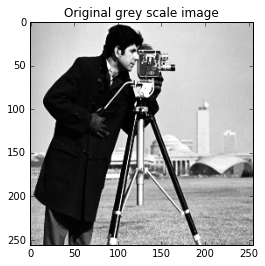

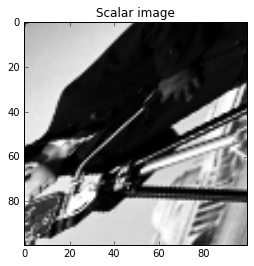

In [5]:
img2 = imread('TestData/cameraman1.png')
plt.imshow(img2, cmap=plt.cm.gray)
plt.title("Original grey scale image")
plt.show()

img_affine = affineTransform(img2, 0, 0, 50, 150, 150, 50, 100, 100)

plt.imshow(img_affine, cmap=plt.cm.gray)
plt.title("Scalar image")
plt.show()

* *situations where (xi,yi) are chosen outside the original image (e.g. when you want to rotate the image around its center).*

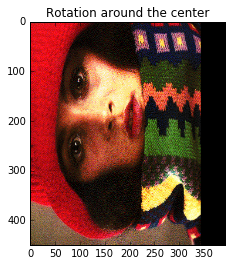

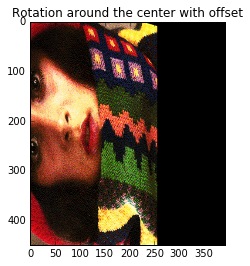

In [6]:
x, y, _ = img.shape

img_affine = affineTransform(img, x, 0, x, y, 0, 0, x, y)

plt.imshow(img_affine)
plt.title("Rotation around the center")
plt.show()

img_affine = affineTransform(img, x, 100, x + 100, y + 100, 0, 100, x, y)

plt.imshow(img_affine)
plt.title("Rotation around the center with offset")
plt.show()

*In your report present the code and the formula’s on which it is based together with some examples showing that it works as intented.*

The examples that the code is working are given with the images above. 

An affine transform is described with the following matrix;

$$\begin{split}\begin{pmatrix}x'\\y'\\1\end{pmatrix} =&
\begin{pmatrix}a & b & c\\d & e & f\\0 & 0 & 1\end{pmatrix}
\begin{pmatrix}x\\y\\1\end{pmatrix}\end{split}$$

a, b, c, d, e, f can be calculated with the M matrix;

$$\begin{split}
\begin{pmatrix}
x_1& y_1& 1& 0& 0& 0\\0& 0& 0& x_1& y_1& 1\\
x_2& y_2& 1& 0& 0& 0\\0& 0& 0& x_2& y_2& 1\\
x_3& y_3& 1& 0& 0& 0\\0& 0& 0& x_3& y_3& 1 \end{pmatrix}\end{split}$$

Because $x_{i}$ and $y_{i}$ this could just be filled in in the code. With the following formula;
$$ \begin{pmatrix}a\\b\\c\\d\\e\\f \end{pmatrix}^{-1} = (M^T M)^{-1} M^T q$$
Which is the least squares solution. After we obtained the parameters we can simply fill in the matrix and apply it to the image.

## Perspective transform

Write a function perspectiveTransform(f, x1, y1, x2, y2, x3, y3, x4, y4, width, height) that warps a quadrilateral with vertices at (x1,y1), (x2,y2), (x3,y3) and (x4,y4) to a new image of given width and height. The mapping is given by the following table:

| i | $(x_{i}, y_{i})$ | $(x^{'}_{i}, y^{'}_{i})$ |
|---|------------------|--------------------------|
| 1 | (x1, y1)| (0,0)                  |
| 2 | (x2, y2) | (width - 1,0)          |
| 3 | (x3, y3) | (0,height - 1)         |
| 4 | (x4, y4) | (width - 1,height - 1)         |

In [7]:
def perspectiveTransform(f, x1, y1, x2, y2, x3, y3, x4, y4, 
                         width, height):
    dx2 = width - 1
    dy3 = height - 1
    dx4 = width - 1
    dy4 = height - 1
    
    M = np.matrix([[x1, y1, 1, 0, 0 ,0, 0, 0, 0],
                   [0, 0, 0, x1, y1, 1, 0, 0, 0],
                   [x2, y2, 1, 0, 0 ,0, -dx2 * x2, -dx2 * y2, -dx2],
                   [0, 0, 0, x2, y2, 1, 0, 0, 0],
                   [x3, y3, 1, 0, 0 ,0, 0, 0, 0],
                   [0, 0, 0, x3, y3, 1, -dy3 * x3, -dy3 * y3, -dy3],
                   [x4, y4, 1, 0, 0 ,0, -dx4 * x4, -dx4 * y4, -dx4],
                   [0, 0, 0, x4, y4, 1, -dy4 * x4, -dy4 * y4, -dy4]]) 
    
    _, _, V = np.linalg.svd(M)
    
    p = V[-1]
    A = p.reshape(3, 3)
    trans = warp(f, np.linalg.inv(A), output_shape=[height, width])
    
    return trans    

*Be sure that your code works with:*

* *image of unequal width and height*


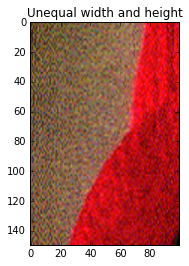

In [8]:
img_perspective = perspectiveTransform(img, 0, 0, 100, 0, 0, 100, 
                                       100, 100, 100, 150)


plt.imshow(img_perspective)
plt.title("Unequal width and height")
plt.show()

* *scalar and color images*

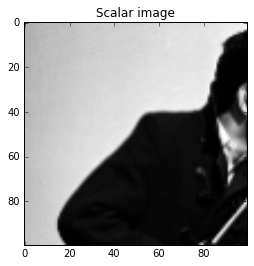

In [9]:
img_perspective = perspectiveTransform(img2, 0, 0, 100, 0, 0, 100, 
                                       100, 100, 100, 100)

plt.imshow(img_perspective, cmap=plt.cm.gray)
plt.title("Scalar image")
plt.show()

*In your report present the code and the formula’s on which it is based together with some examples showing that it works as intented.*

With the examples above you can see that the code works as intended. To make it work we implemented the following matrix.

$$\begin{split}s\begin{pmatrix}x'\\y'\\1\end{pmatrix} =&
\begin{pmatrix}a & b & c\\d & e & f\\g & h & i\end{pmatrix}
\begin{pmatrix}x\\y\\1\end{pmatrix} \\
\end{split}$$

We can get the parameters by rewriting this formula and stack the x_{i} and y_{i} values in a matrix. By rewriting we also know that the following expression is true;

$$\begin{split}\begin{pmatrix}
x_1 & y_1 & 1 & 0 & 0 & 0 & -x_1'x_1 & -x_1'y_1 & -x_1'\\
0 & 0 & 0 & x_1 & y_1 & 1 & -y_1'x_1 & -y_1'y_1 & -y_1'\\
x_2 & y_2 & 1 & 0 & 0 & 0 & -x_2'x_2 & -x_2'y_2 & -x_2'\\
0 & 0 & 0 & x_2 & y_2 & 1 & -y_2'x_2 & -y_2'y_2 & -y_2'\\
x_3 & y_3 & 1 & 0 & 0 & 0 & -x_3'x_3 & -x_3'y_3 & -x_3'\\
0 & 0 & 0 & x_3 & y_3 & 1 & -y_3'x_3 & -y_3'y_3 & -y_3'\\
x_4 & y_4 & 1 & 0 & 0 & 0 & -x_4'x_4 & -x_4'y_4 & -x_4'\\
0 & 0 & 0 & x_4 & y_4 & 1 & -y_4'x_4 & -y_4'y_4 & -y_4'
\end{pmatrix}
\begin{pmatrix}a\\b\\c\\d\\e\\f\\g\\h\\i \end{pmatrix} =&
\begin{pmatrix}0\\0\\0\\0\\0\\0\\0\\0 \end{pmatrix} \\
\end{split}$$

With the help of the singular value decomposition $UDV^T$ from M we can figure out that the last column of V are the values of p we need.

*You should at least be able to redo the following example (make a reasonable choice for width and heigth of the new image assuming the flyer is of A4 shape).*

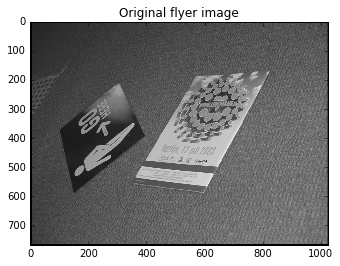

In [10]:
img3 = imread('TestData/flyeronground.png')
plt.imshow(img3, cmap=plt.cm.gray)
plt.title("Original flyer image")
plt.show()

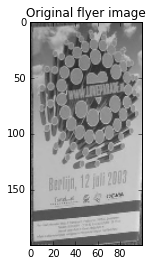

In [11]:
img_perspective = perspectiveTransform(img3, 570, 180, 800, 180, 
                                       350, 540, 600, 600, 100, 200)

plt.imshow(img_perspective, cmap=plt.cm.gray)
plt.title("Original flyer image")
plt.show()